🚀 Starting High-Accuracy Transit Ridership Prediction Model...

✅ Dataset Loaded Successfully!
📊 Records: 500, Columns: ['Day', 'Route', 'Weather', 'Temperature', 'Holiday', 'Ridership']

Missing Values:
 Day            0
Route          0
Weather        0
Temperature    0
Holiday        0
Ridership      0
dtype: int64 

Train: (400, 17), Test: (100, 17)

✅ Model Training Completed!

📈 Model Performance Summary:
                     Metric   Value
0                  R² Score   0.888
1       Mean Absolute Error  50.340
2  Cross-Val Score (5-Fold)   0.867 

 Feature Importance plot saved as 'feature_importance_rf.png'

 Actual vs Predicted plot saved as 'actual_vs_predicted_rf.png'

Model saved as 'ridership_rf_model.pkl'

📥 Sample predictions saved as 'sample_predictions_rf.csv'

✅ All tasks completed successfully!
🔥 AI model is ready — check saved visuals & model file.


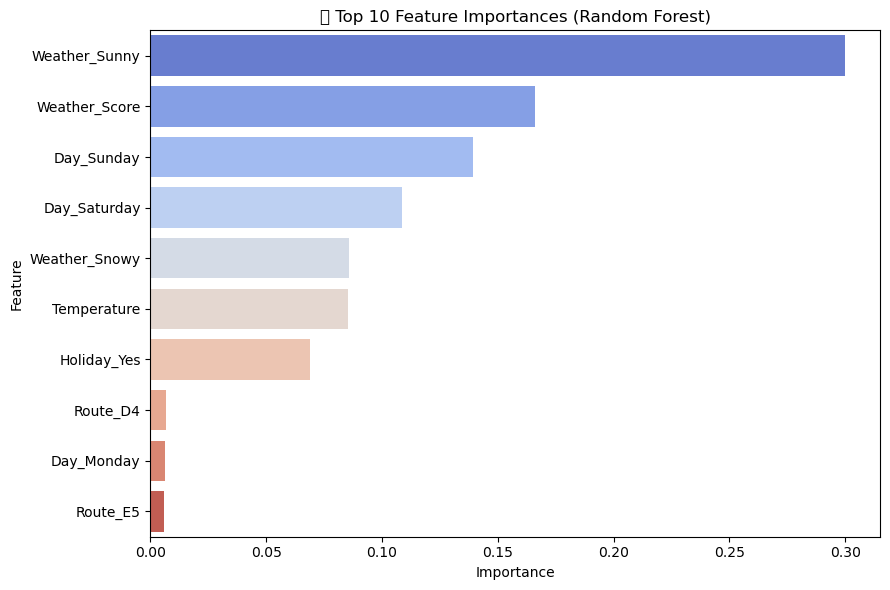

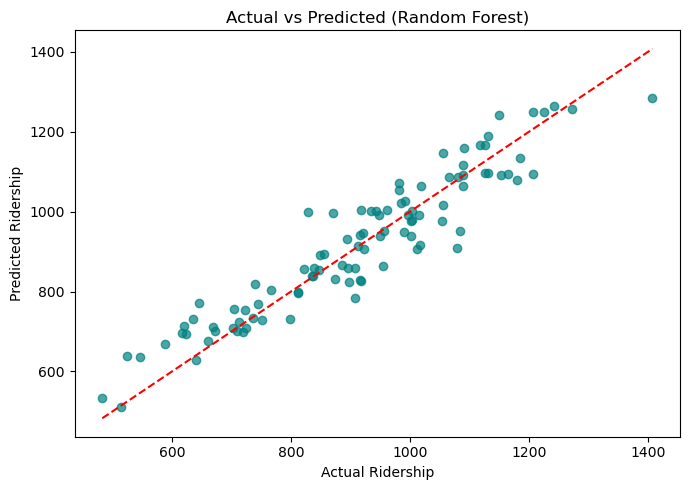

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

warnings.filterwarnings("ignore")

print("🚀 Starting High-Accuracy Transit Ridership Prediction Model...\n")


df = pd.read_csv("transit_ridership_v2.csv")
print("✅ Dataset Loaded Successfully!")
print(f"📊 Records: {len(df)}, Columns: {list(df.columns)}\n")


print("Missing Values:\n", df.isnull().sum(), "\n")
df.dropna(inplace=True)


if "Temperature" in df.columns and "Weather" in df.columns:
    df["Weather_Score"] = df["Temperature"] * df["Weather"].factorize()[0]

# Encode categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

target = "Ridership"
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(f"Train: {X_train.shape}, Test: {X_test.shape}\n")

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)
print("✅ Model Training Completed!\n")


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
cv_score = np.mean(cross_val_score(model, X_scaled, y, cv=5))

print("📈 Model Performance Summary:")
performance = pd.DataFrame({
    "Metric": ["R² Score", "Mean Absolute Error", "Cross-Val Score (5-Fold)"],
    "Value": [round(r2, 3), round(mae, 2), round(cv_score, 3)]
})
print(performance, "\n")


importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(x="Importance", y="Feature", data=importance.head(10), palette="coolwarm")
plt.title("🔥 Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.savefig("feature_importance_rf.png")
print(" Feature Importance plot saved as 'feature_importance_rf.png'\n")


plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Ridership")
plt.ylabel("Predicted Ridership")
plt.title("Actual vs Predicted (Random Forest)")
plt.tight_layout()
plt.savefig("actual_vs_predicted_rf.png")
print(" Actual vs Predicted plot saved as 'actual_vs_predicted_rf.png'\n")


pickle.dump(model, open("ridership_rf_model.pkl", "wb"))
print("Model saved as 'ridership_rf_model.pkl'\n")


sample = X_test[:5]
pred_values = model.predict(sample)
pred_df = pd.DataFrame(sample, columns=X.columns)
pred_df["Predicted_Ridership"] = np.round(pred_values, 2)
pred_df.to_csv("sample_predictions_rf.csv", index=False)
print("📥 Sample predictions saved as 'sample_predictions_rf.csv'\n")

print("✅ All tasks completed successfully!")
print("🔥 AI model is ready — check saved visuals & model file.")
